In [58]:
#importing all the libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
import timeit

In [45]:
%matplotlib inline

## Part 1: Data exploration and preprocessing

In [3]:
#importing the csv file

bank = pd.read_csv('UniversalBank_unprocessed.csv')
bank.head(20) 

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,CD Account,Online,CreditCard,Personal Loan
0,1,39,13.0,58.0,3,2.10,Undergraduate,169,0,1,0,0
1,2,51,25.0,18.0,1,0.30,Advanced,93,0,0,1,0
2,3,43,13.0,38.0,3,2.00,Advanced,0,0,1,0,0
3,4,37,12.0,60.0,4,2.10,Advanced,217,0,1,0,0
4,5,23,NaN,149.0,1,6.33,Undergraduate,305,0,0,1,0
5,6,60,36.0,30.0,4,1.30,Undergraduate,118,0,1,1,0
6,7,57,32.0,31.0,3,0.10,Masters,0,0,1,0,0
7,8,45,19.0,122.0,4,4.10,Masters,0,0,1,0,1
8,9,56,29.0,42.0,4,2.50,Masters,0,0,0,0,0
9,10,50,25.0,112.0,1,0.60,Undergraduate,0,0,0,0,0


In [77]:
#counting the number of rows and columns
print(bank.shape)

(1117, 12)


In [78]:
#exploring the datatypes of the columns
bank.dtypes

ID                 int64
Age                int64
Experience       float64
Income           float64
Family             int64
CCAvg            float64
Education         object
Mortgage           int64
CD Account         int64
Online             int64
CreditCard         int64
Personal Loan      int64
dtype: object

In [20]:
# some statistics for each column that is a numerical data type (i.e., float, integer)

bank.describe()

,ID,Age,Experience,Income,Family,CCAvg,Mortgage,CD Account,Online,CreditCard,Personal Loan
count,1117.000000,1117.000000,1113.000000,1114.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000
mean,559.000000,45.456580,20.263252,99.535009,2.502238,2.695801,72.025067,0.148612,0.601611,0.293644,0.429722
std,322.594431,11.514723,11.514062,54.566059,1.147400,2.114854,127.799025,0.355865,0.489786,0.455635,0.495258
min,1.000000,23.000000,-2.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,35.000000,10.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,559.000000,45.000000,20.000000,95.000000,3.000000,2.200000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,838.000000,55.000000,30.000000,145.000000,4.000000,4.000000,114.000000,0.000000,1.000000,1.000000,1.000000
max,1117.000000,67.000000,42.000000,218.000000,4.000000,10.000000,617.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#counting the number of nulls
bank.isnull().sum()

ID               0
Age              0
Experience       4
Income           3
Family           0
CCAvg            0
Education        0
Mortgage         0
CD Account       0
Online           0
CreditCard       0
Personal Loan    0
dtype: int64

In [7]:
#counting values for Response variable
bank['Personal Loan'].value_counts()

0    637
1    480
Name: Personal Loan, dtype: int64

In [8]:
#counting values for 'Mortgage' predictor
bank['Mortgage'].value_counts()

0      752
89       5
301      5
144      5
115      4
      ... 
524      1
228      1
455      1
93       1
253      1
Name: Mortgage, Length: 219, dtype: int64

In [81]:
#counting values for Education column
bank['Education'].value_counts()

Undergraduate    389
Advanced         383
Masters          345
Name: Education, dtype: int64

<AxesSubplot:>

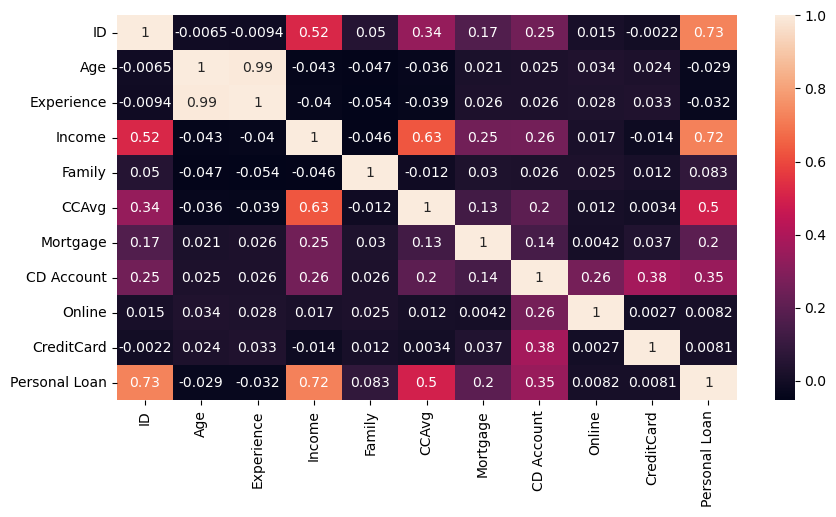

In [53]:
#Determing correlation between variables. We will ignore the values for response variable here. Strongly correlated predictors will bias the prediction and therefore one of them should be dropped. 

correlation_matrix = bank.corr()

#sns.heatmap(correlation_matrix, annot = True)

plt.figure(figsize = (10,5))
sns.heatmap(correlation_matrix, annot=True)


In [ ]:
# Dropping the correlated and not useful predictors
# ID is just a row identifier, it has no role to play in predicting the response variable. 
# Age and Experience were highly correlated, therefore, Experience can be dropped. 
# As seen above the Mortgage has a lot '0' values, so that can also dropped.  

bank1 = bank.drop(["ID", "Experience", "Mortgage"], axis = 1)
bank1.head()

In [11]:
#Flagging the categorical variables

bank_new = pd.get_dummies(bank1, drop_first = True)
bank_new.head()

,Age,Income,Family,CCAvg,CD Account,Online,CreditCard,Personal Loan,Education_Masters,Education_Undergraduate
0,39,58.0,3,2.10,0,1,0,0,0,1
1,51,18.0,1,0.30,0,0,1,0,0,0
2,43,38.0,3,2.00,0,1,0,0,0,0
3,37,60.0,4,2.10,0,1,0,0,0,0
4,23,149.0,1,6.33,0,0,1,0,0,1


In [14]:
#Seperating the predictors and response variable

predictors_df = bank_new[['Age','Income','Family','CCAvg','Education_Masters','Education_Undergraduate','CD Account','Online','CreditCard']]
response_df = bank_new['Personal Loan']
predictors_df.head()

,Age,Income,Family,CCAvg,Education_Masters,Education_Undergraduate,CD Account,Online,CreditCard
0,39,58.0,3,2.10,0,1,0,1,0
1,51,18.0,1,0.30,0,0,0,0,1
2,43,38.0,3,2.00,0,0,0,1,0
3,37,60.0,4,2.10,0,0,0,1,0
4,23,149.0,1,6.33,0,1,0,0,1


In [15]:
#Checking the null values again after dropping predictors
predictors_df.isnull().sum()

Age                        0
Income                     3
Family                     0
CCAvg                      0
Education_Masters          0
Education_Undergraduate    0
CD Account                 0
Online                     0
CreditCard                 0
dtype: int64

In [16]:
# impute NA values with k-NN imputer 

imputer = KNNImputer(n_neighbors=5)
predictors_df = pd.DataFrame(imputer.fit_transform(predictors_df), columns = predictors_df.columns)
predictors_df

,Age,Income,Family,CCAvg,Education_Masters,Education_Undergraduate,CD Account,Online,CreditCard
0,39.0,58.0,3.0,2.10,0.0,1.0,0.0,1.0,0.0
1,51.0,18.0,1.0,0.30,0.0,0.0,0.0,0.0,1.0
2,43.0,38.0,3.0,2.00,0.0,0.0,0.0,1.0,0.0
3,37.0,60.0,4.0,2.10,0.0,0.0,0.0,1.0,0.0
4,23.0,149.0,1.0,6.33,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1112,37.0,123.0,4.0,3.10,1.0,0.0,1.0,1.0,1.0
1113,37.0,158.0,2.0,2.30,1.0,0.0,1.0,1.0,1.0
1114,53.0,120.0,4.0,2.70,1.0,0.0,1.0,1.0,0.0
1115,26.0,179.0,4.0,2.10,1.0,0.0,0.0,0.0,0.0


In [18]:
# ensure all the null values have been imputed
predictors_df.isnull().sum()

Age                        0
Income                     0
Family                     0
CCAvg                      0
Education_Masters          0
Education_Undergraduate    0
CD Account                 0
Online                     0
CreditCard                 0
dtype: int64

In [22]:
# some statistics for each column that is a numerical data type (i.e., float, integer)

predictors_df.describe()

,Age,Income,Family,CCAvg,Education_Masters,Education_Undergraduate,CD Account,Online,CreditCard
count,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000
mean,45.456580,99.476276,2.502238,2.695801,0.308863,0.348254,0.148612,0.601611,0.293644
std,11.514723,54.512179,1.147400,2.114854,0.462231,0.476630,0.355865,0.489786,0.455635
min,23.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,95.000000,3.000000,2.200000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,145.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,67.000000,218.000000,4.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# Since mmost of the predictors have difference in their ranges, we will scale them using z-score normalization.(i.e., force all predictors to have mean = 0  and standard deviation = 1)

z_score_norm = preprocessing.StandardScaler()
predictor_df_normalized = z_score_norm.fit_transform(predictors_df)
predictor_df_normalized = pd.DataFrame(predictor_df_normalized, columns = predictors_df.columns)
predictor_df_normalized.head(10)

,Age,Income,Family,CCAvg,Education_Masters,Education_Undergraduate,CD Account,Online,CreditCard
0,-0.560975,-0.761203,0.434011,-0.281848,-0.668499,1.368015,-0.417796,0.813758,-0.644760
1,0.481636,-1.495313,-1.309840,-1.133352,-0.668499,-0.730986,-0.417796,-1.228866,1.550964
2,-0.213438,-1.128258,0.434011,-0.329154,-0.668499,-0.730986,-0.417796,0.813758,-0.644760
3,-0.734744,-0.724498,1.305937,-0.281848,-0.668499,-0.730986,-0.417796,0.813758,-0.644760
4,-1.951123,0.908896,-1.309840,1.719186,-0.668499,1.368015,-0.417796,-1.228866,1.550964
5,1.263594,-1.275080,1.305937,-0.660294,-0.668499,1.368015,-0.417796,0.813758,1.550964
6,1.002941,-1.256727,0.434011,-1.227964,1.495888,-0.730986,-0.417796,0.813758,-0.644760
7,-0.039670,0.413372,1.305937,0.664267,1.495888,-0.730986,-0.417796,0.813758,-0.644760
8,0.916057,-1.054847,1.305937,-0.092625,1.495888,-0.730986,-0.417796,-1.228866,-0.644760
9,0.394752,0.229845,-1.309840,-0.991435,-0.668499,1.368015,-0.417796,-1.228866,-0.644760


## Part 2: $k$-NN

In [25]:
# partition data into training and test sets 

X_classifier = predictor_df_normalized
y_classifier = response_df
train_X_classifier, test_X_classifier, train_y_classifier, test_y_classifier = train_test_split(X_classifier, 
                                                            y_classifier, test_size=0.3, random_state=616)

In [55]:
# train the k-NN model and look at performance on train data

knn = KNeighborsClassifier(n_neighbors=5).fit(train_X_classifier, train_y_classifier)
predicted_y_training = knn.predict(train_X_classifier)
f1_score(train_y_classifier, predicted_y_training)


C:\Users\abhis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9445277361319341

In [30]:
# performance of k-NN on test data

predicted_y_test = knn.predict(test_X_classifier)
f1_score(test_y_classifier, predicted_y_test)

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9187279151943463

In [31]:
# train a classifier for different values of k

results = []
for k in range(1, 20):
    knn2 = KNeighborsClassifier(n_neighbors=k).fit(train_X_classifier, train_y_classifier)
    results.append({
        'k': k,
        'f1_score': f1_score(test_y_classifier, knn2.predict(test_X_classifier))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\abhis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

     k  f1_score
0    1  0.898955
1    2  0.871212
2    3  0.900000
3    4  0.875472
4    5  0.918728
5    6  0.884758
6    7  0.907143
7    8  0.878229
8    9  0.899281
9   10  0.884758
10  11  0.909091
11  12  0.884758
12  13  0.897810
13  14  0.893773
14  15  0.897810
15  16  0.885609
16  17  0.893773
17  18  0.888889
18  19  0.901099


C:\Users\abhis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\abhis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

## Part 3: Logistic regression

In [32]:
# train the LR model and look at performance on train data

logistic_model = LogisticRegression()
logistic_model = logistic_model.fit(train_X_classifier, train_y_classifier)
predicted_y_training2 = logistic_model.predict(train_X_classifier)
f1_score(train_y_classifier, predicted_y_training2)

0.8875562218890555

In [33]:
# performance of LR on test data

predicted_y_test2 = logistic_model.predict(test_X_classifier)
f1_score(test_y_classifier, predicted_y_test2)

0.861111111111111